## 🦋 Butterfly Image Classification

### Objective
Identify the class to which each butterfly. Link to dataset -> [Kaggle](https://www.kaggle.com/datasets/phucthaiv02/butterfly-image-classification/code?datasetId=3442424&sortBy=voteCount)

### Data Analysis

For data analysis, we will use a pre-prepared Jupyter Notebook available at [Kaggle](https://www.kaggle.com/code/edumisvieramartin/butterfly-multiclass-image-classification-cnn). This notebook provides a structured and comprehensive approach to exploring the Butterfly Image Classification dataset.


In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from typing import List, Tuple
from PIL import Image
import numpy as np
import ipywidgets as widgets



In [5]:

df = pd.read_csv("/app/data/archive/Training_set.csv")
df.head(10)

,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA
3,Image_4.jpg,MONARCH
4,Image_5.jpg,GREEN CELLED CATTLEHEART
5,Image_6.jpg,CAIRNS BIRDWING
6,Image_7.jpg,GREEN CELLED CATTLEHEART
7,Image_8.jpg,EASTERN DAPPLE WHITE
8,Image_9.jpg,BROWN SIPROETA
9,Image_10.jpg,RED POSTMAN


/tmp/ipykernel_2269/3865910680.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


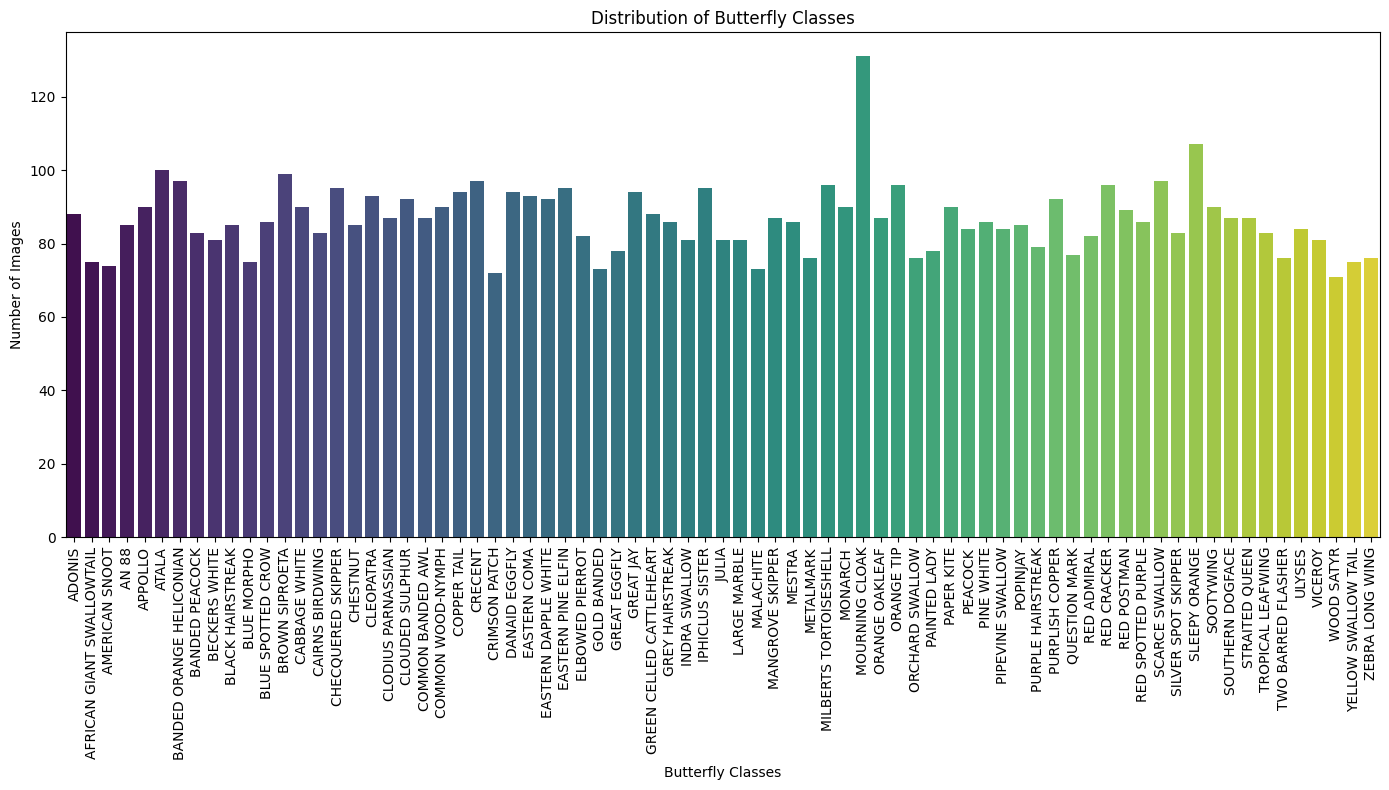

In [6]:
class_counts = df['label'].value_counts().sort_index()

plt.figure(figsize=(14, 8))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribution of Butterfly Classes')
plt.xlabel('Butterfly Classes')
plt.ylabel('Number of Images')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
def load_images_and_labels(
    image_paths: List[str],
    labels: List[str],
    image_size: Tuple[int, int] = (128, 128)
) -> Tuple[List[np.ndarray], List[str]]:
    """
    Load images from file paths, resize them, and normalize pixel values.

    Args:
        image_paths (List[str]): List of file paths to the images.
        labels (List[str]): Corresponding labels for the images.
        image_size (Tuple[int, int]): Target size for the images (width, height).

    Returns:
        Tuple[List[np.ndarray], List[str]]: A tuple containing a list of normalized image arrays and their labels.
    """
    images = []
    valid_labels = []
    for path, label in zip(image_paths, labels):
        try:
            img = Image.open(path)  # Open the image
            img = img.resize(image_size)  # Resize the image
            img_array = np.array(img) / 255.0  # Normalize pixel values
            images.append(img_array)
            valid_labels.append(label)
        except Exception as e:
            print(f"Error loading image {path}: {e}")
    return images, valid_labels

def display_images_with_labels(images: List[np.ndarray], labels: List[str]) -> None:
    """
    Display images with their corresponding labels using a slider for navigation.

    Args:
        images (List[np.ndarray]): List of normalized image arrays.
        labels (List[str]): List of labels corresponding to the images.
    """
    if not images:
        print("No images to display. Please check the image paths.")
        return

    def view_image(index: int) -> None:
        """
        Display a single image and its label based on the index.

        Args:
            index (int): Index of the image to display.
        """
        plt.figure(figsize=(5, 5))
        plt.imshow(images[index])
        plt.title(f"Class: {labels[index]}")
        plt.axis('off')
        plt.show()

    # Create a slider widget to navigate through the images
    slider = widgets.IntSlider(value=0, min=0, max=len(images) - 1, step=1, description='Image Index:')
    output = widgets.Output()

    def on_slider_change(change):
        with output:
            output.clear_output(wait=True)
            view_image(change['new'])

    slider.observe(on_slider_change, names='value')
    display(slider, output)

# Example usage:
# Define paths and labels for demonstration purposes
num_examples = 100

# Replace 'data_visualization' with your DataFrame containing `filename` and `label`
data_visualization = df.sample(num_examples)  # Assuming df is already defined
path_to_data = "/app/data/archive/train"  # Update to your data directory

# Get image paths and labels
image_paths = [os.path.join(path_to_data, name_file) for name_file in data_visualization['filename']]
labels = list(data_visualization['label'])

# Parameters
target_image_size = (224, 224)  # Desired size of images (width, height)

# Load and display images
images, labels = load_images_and_labels(image_paths, labels, target_image_size)
display_images_with_labels(images, labels)


In [9]:
unique_classes_count = df['label'].nunique()
print(f"Number of unique classes: {unique_classes_count}")

Number of unique classes: 75


In [10]:
total_labels = df['label'].count()
print(f"Total number of labels: {total_labels}")

Total number of labels: 6499


In [11]:
from IPython.core.display import display, HTML

# Create a DataFrame with class distribution
class_counts = df['label'].value_counts()
class_percentages = (class_counts / class_counts.sum() * 100).round(2)

class_distribution_df = pd.DataFrame({
    'Class': class_counts.index,
    'Image Count': class_counts.values,
    'Percentage (%)': class_percentages.values
})

# Convert DataFrame to HTML with scrollable view
html = class_distribution_df.to_html(index=False)
scrollable_html = f"""
<div style="height:400px; overflow:auto; border:1px solid #ddd; padding:10px">
{html}
</div>
"""
display(HTML(scrollable_html))


/tmp/ipykernel_2269/293211819.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


Class,Image Count,Percentage (%)
MOURNING CLOAK,131,2.02
SLEEPY ORANGE,107,1.65
ATALA,100,1.54
BROWN SIPROETA,99,1.52
CRECENT,97,1.49
SCARCE SWALLOW,97,1.49
BANDED ORANGE HELICONIAN,97,1.49
MILBERTS TORTOISESHELL,96,1.48
RED CRACKER,96,1.48
ORANGE TIP,96,1.48


### Brief Summary of the Data:

1. **General Characteristics:**
   - **Number of classes:** 75.
   - **Total number of images:** 6499.
   - **Average number of images per class:** ~86.
   - **Image size:** 224×224, color.
   - **Content:** All images contain the classification object (butterflies).

2. **Class Imbalance:**
   - Most represented class: **131 images (2.02%)**.
   - Least represented class: **71 images (1.09%)**.
   - Moderate imbalance between classes (~2x).

3. **Data Quality:**
   - Images are taken from different angles and under varying lighting conditions, which adds beneficial variability.
   - The features distinguishing the classes are not visually obvious, which could complicate model training.

4. **Specifics:**
   - The input data is of sufficient quality for classification, but additional work on class imbalance and feature extraction might be required.


Unfortunately, we do not have labels for the test set. Therefore, I will split the training data into 80% for training and 20% for validation. The data will be divided in a stratified manner to ensure class balance in both sets.



Since the data was not initially prepared for the `FolderImageDataset` class, it had to be converted into the correct format. 

### Dataset Structure

```
train_folder/
│
├── ADONIS/
│   ├── image1.jpg
│   ├── image2.jpg
│   └── ...
│
├── AFRICAN GIANT SWALLOWTAIL/
│   ├── image1.jpg
│   ├── image2.jpg
│   └── ...
│
├── AMERICAN SNOOT/
│   ├── image1.jpg
│   ├── image2.jpg
│   └── ...
│
...
```

This hierarchical folder structure is essential for the `FolderImageDataset` class to correctly identify and load images for each class.

---

### Configuration File
After preparing the dataset, an immutable seed is set in the configuration file to ensure reproducible splitting of the data into training (`train`) and validation (`val`) sets. Below is the relevant part of the YAML configuration file that handles the dataset setup:

```yaml
data:
  class_path: dataset_modules.image_data_module.ImageDataModule
  init_args:
    num_workers: 8                                    # Number of data loading workers
    batch_size: 16                                    # Batch size for training
    create_dataset: false                             # If true, will create the dataset from scratch

    dataset_classes:
      - class_path: dataset_modules.folder_image_dataset.FolderImageDataset
        init_args:
          train_val_dir: "data/archive/train_folder"      # Directory for training and validation data
          validation_split: 0.2                           # Split ratio for validation data
```

### Key Points:
1. **`num_workers`:** Specifies the number of parallel workers for data loading.
2. **`batch_size`:** Defines the number of images in each batch for training.
3. **`create_dataset`:** If set to `true`, the dataset will be generated from scratch (not used in this case).
4. **`validation_split`:** Splits the training data into 80% training and 20% validation.

This setup ensures that the data loader is ready to efficiently feed images into the model during training and validation.



# Default Configuration for Training

We will now create a **default configuration file** for training. This configuration will serve as a base and can be modified from experiment to experiment. The configuration includes:
- Setting a seed for reproducibility.
- Defining the number of classes for our task.
- Specifying the image dimensions for training.
- Initializing all necessary components for training.

Below is an example YAML configuration file:

```yaml
# Configuration file for training a model using PyTorch Lightning.
# Contains model, data, training, and logging configurations.

seed_everything: 42  # Seed for reproducibility across experiments
ckpt_path: null   # Checkpoint path (set to null to start from scratch)

# Anchor definitions for num_classes and image dimensions
num_classes: &num_classes 75
image_height: &image_height 224
image_width: &image_width 224

experiment:
  custom_folder_name: null # Custom folder name for storing experiment data
  only_weights_load: false           # Flag to load only model weights from a checkpoint
  default_names:
    - custom_folder_name
    - model_name
    - num_classes
    - optimizer
    - lr
    - image_height
    - image_width
    - freeze_encoder

model:
  class_path: models.image_classification_module.ImageClassificationModule
  init_args:
    model:
      class_path: models.models.ImageClassification  # Path to the model class
      init_args:
        model_name: google/efficientnet-b3            # Pre-trained model name
        num_classes: *num_classes                     # Number of classes for output layer
        freeze_encoder: true                          # Freeze encoder layers for transfer learning
        optimizer_config:
          scheduler: ReduceLROnPlateau
          patience: 5
          gamma: 0.5
          lr:  0.05

    # Loss function configuration
    loss_fn:
      class_path: torch.nn.CrossEntropyLoss           # Loss function class path
      init_args: {}                                   # No additional parameters for CrossEntropyLoss

# Common transformations for normalization and resizing
common_transforms: &common_transforms
  - class_path: dataset_modules.augmentations.Normalize
    init_args:
      mean: [0.485, 0.456, 0.406]                   # Mean for each RGB channel
      std: [0.478, 0.473, 0.474]                    # Standard deviation for each RGB channel
      max_pixel_value: 255.0                        # Max pixel value for normalization

  - class_path: albumentations.pytorch.transforms.ToTensorV2
    init_args: {}                                   # Convert image to PyTorch tensor

data:
  class_path: dataset_modules.image_data_module.ImageDataModule
  init_args:
    num_workers: 8                                    # Number of data loading workers
    batch_size: 16                                    # Batch size for training
    create_dataset: false                             # If true, will create the dataset from scratch

    dataset_classes:
      - class_path: dataset_modules.folder_image_dataset.FolderImageDataset
        init_args:
          train_val_dir: "data/archive/train_folder"      # Directory for training and validation data
          validation_split: 0.2

    normalizations: *common_transforms                # Reuse normalizations defined in common_transforms

    # Augmentations pipeline with additional transformations
    augmentations: *common_transforms

# Common metric arguments for consistent metric setup
metric_common_args: &metric_common_args
  task: multiclass                                  # Metric type for multiclass classification
  average: "macro"                                  # Average type for metric calculation
  num_classes: *num_classes                         # Total number of classes

trainer:
  accelerator: "gpu"                                # Hardware accelerator to use
  devices: [0]                                      # GPU device ID(s) to use
  max_epochs: 50                                    # Maximum number of training epochs
  precision: 16-mixed                               # Mixed precision training (16-bit)
  limit_train_batches: 1.0                          # Fraction of training batches to use per epoch
  limit_val_batches: 1.0                            # Fraction of validation batches to use per epoch
  fast_dev_run: true                               # Run a fast dev test, e.g., for debugging

  # Callback configurations
  callbacks:
    # Periodic checkpoint saving configuration
    - class_path: toolkit.callbacks.PeriodicCheckpointSaver
      init_args:
        filename: "{epoch:02d}-{validation_f1_score:.4f}"  # Filename format for checkpoints
        monitor: "validation_f1_score"              # Metric to monitor for saving
        mode: "max"                                 # Maximize the monitored metric
        save_top_k: 3                               # Number of top checkpoints to keep
        verbose: true                               # Log checkpoint saving
        every_n_epochs: 10

    # Metrics logger configuration for multiple metrics
    - class_path: toolkit.callbacks.MetricsLoggerCallback
      init_args:
        metrics:
          accuracy:
            class_path: torchmetrics.Accuracy
            init_args:
              <<: *metric_common_args               # Reuse common metric arguments

          precision:
            class_path: torchmetrics.Precision
            init_args:
              <<: *metric_common_args

          recall:
            class_path: torchmetrics.Recall
            init_args:
              <<: *metric_common_args

          f1_score:
            class_path: torchmetrics.F1Score
            init_args:
              <<: *metric_common_args

    # Progress bar for training
    - class_path: pytorch_lightning.callbacks.TQDMProgressBar
      init_args:
        refresh_rate: 5                             # Update rate for progress bar

    # Early stopping configuration
    - class_path: pytorch_lightning.callbacks.EarlyStopping
      init_args:
        monitor: "validation_f1_score"              # Metric to monitor for stopping
        mode: "max"                                 # Stop when maximizing the metric
        patience: 10                                # Number of epochs with no improvement before stopping
        verbose: true                               # Log early stopping
```


### Training Process Overview

### Step 1: Linear Layer Training
In the initial stage of training, we will only fine-tune the **output linear layer** of the model. The following configurations will be used:
- **Loss Function:** CrossEntropyLoss
- **Learning Rate (lr):** 0.05

### Learning Rate Adjustment
The learning rate will be **automatically reduced** if our target metric does not improve for **5 consecutive epochs**. This allows the model to adjust and focus on optimizing performance.

### Metrics Calculation
We will evaluate the model using the following metrics:
- **Macro Accuracy**
- **Precision**
- **Recall**
- **F1-Score**

The **F1-Score** will serve as our **target metric**, guiding the training process and performance evaluation.

### Early Stopping
To avoid overfitting and save computational resources, we will implement **early stopping**. Training will halt if there are no improvements in the target metric (F1-Score) for **10 consecutive epochs**.

### Maximum Number of Epochs
The training process will run for a maximum of **50 epochs**, ensuring that the model has enough iterations to converge while preventing unnecessary overtraining.

This setup ensures an efficient and focused training process, adapting the learning rate dynamically and stopping when further training becomes unnecessary.


In [ ]:
!cd /app && python main.py --config examples/classification/butterfly_classification/butterfly.yaml



### Training Insights and Next Steps

### Best Model Performance
From our initial training session, the model achieved its best performance at **epoch 21** with the following result:
```
epoch=21-validation_f1_score=0.8766.ckpt
```

### Current Focus
At this stage, we will not analyze which specific classes are causing challenges. This detailed analysis will be conducted at a later stage of the project.

### Experiment Proposal
Currently, I am interested in determining whether the model can converge to a similar result as quickly if we **replace the data normalization step** with the following configuration in the YAML file:

```yaml
# Common transformations for normalization and resizing
common_transforms: &common_transforms
  - class_path: albumentations.ToFloat

  - class_path: albumentations.pytorch.transforms.ToTensorV2
    init_args: {}                                   # Convert image to PyTorch tensor
```

This change involves replacing the `dataset_modules.augmentations.Normalize` class with `albumentations.ToFloat`, which adjusts how data is normalized before training.

### Next Steps
1. Replace the normalization configuration in the YAML file as shown above.
2. Train the model again and compare:
   - Convergence speed (number of epochs required to reach the best F1-Score).
   - Final performance metrics (F1-Score, Accuracy, Precision, and Recall).

By conducting this experiment, we can better understand the impact of this modification on the model’s convergence and performance.


In [ ]:
!cd /app && python main.py --config examples/classification/butterfly_classification/butterfly.yaml



### Results Analysis: Data Normalization Comparison

The best result using data normalization with **`albumentations.ToFloat`** was achieved at:
```
epoch=41-validation_f1_score=0.8443.ckpt
```

However, it is evident that preprocessing with **`dataset_modules.augmentations.Normalize`** produces better results. This is likely because the model we are fine-tuning was originally trained using this specific normalization method. Consistency in data preprocessing aligns better with the model's pretraining, leading to improved performance.

### Key Takeaway
Using the same normalization method as the one employed during the model's pretraining significantly impacts fine-tuning performance, highlighting the importance of aligning preprocessing techniques.


### Experiment: Training the Entire Model

### Objective
In this experiment, we will train not only the linear layer but the entire model. To achieve this, we will update the configuration file with the following changes:

### Configuration Updates
1. **Unfreeze Encoder**  
   Set `freeze_encoder` to `false` to allow training of the entire model.

2. **Load Pretrained Model Checkpoint**  
   Specify the path to the checkpoint of the previously trained model (linear layer training) using the `ckpt_path` parameter.

3. **Load Only Weights**  
   Set `only_weights_load` to `true` to ensure only the weights are loaded from the checkpoint.

4. **Learning Rate**  
   Set a lower learning rate (`lr: 0.0005`) to prevent overfitting and facilitate fine-tuning of the entire model.


In [ ]:
!cd /app && python main.py --config examples/classification/butterfly_classification/butterfly.yaml



### Experiment Results: Training the Entire Model

After training the entire model (including the encoder), the best result was achieved at:
```
epoch=22-validation_f1_score=0.9189.ckpt
```

### Key Observations
1. **Improved Performance**: 
   - The validation F1-Score significantly improved compared to training only the linear layer, indicating that fine-tuning the encoder layers allowed the model to better adapt to the dataset.

2. **Faster Convergence**:
   - The best performance was achieved at epoch 22, showing relatively quick convergence, despite the reduced learning rate (`lr: 0.0005`).

3. **Importance of Fine-Tuning**:
   - Unfreezing the encoder provided additional flexibility for the model to learn, leveraging pretrained features while adjusting them for the specific task.

### Next Steps
1. Save the best model checkpoint (`epoch=22-validation_f1_score=0.9189.ckpt`) for further use.
2. Compare class-wise performance to identify any remaining challenges.
3. Analyze whether further hyperparameter tuning (e.g., learning rate or optimizer configuration) could lead to additional improvements.


## Addressing Class Imbalance: Loss Functions

### Problem Statement
During the training process, we observed a **class imbalance** in the dataset. This imbalance can negatively impact the model's performance, especially on underrepresented classes. To mitigate this issue, we will experiment with two loss functions:

### 1. Weighted Cross-Entropy Loss
The **Cross-Entropy Loss** will be modified to account for class imbalance by assigning higher weights to underrepresented classes. This ensures that the model pays more attention to these classes during training.

### 2. Focal Loss 
The **Focal Loss** is designed to focus on hard-to-classify examples by reducing the impact of well-classified samples. This makes it particularly effective in addressing class imbalance.



### Experiment: Using Weighted Cross-Entropy Loss

### Objective
To address the class imbalance, we will start by using **WeightedCrossEntropyLoss**. This loss function assigns weights to each class based on their frequency in the dataset, ensuring that underrepresented classes have a stronger influence during training.

### Configuration Update
To implement WeightedCrossEntropyLoss, the configuration file needs to be updated as follows:

```yaml
loss_fn:
  class_path: losses.weighted_cross_entropy.WeightedCrossEntropyLoss          # Loss function class path
  init_args:
    weight_file: /app/data/weights.json                                       # Path to the file containing class weights
```

### Key Steps
1. **Modify the Loss Function Class**:
   - Update the `class_path` in the configuration to point to the new loss function class: `losses.weighted_cross_entropy.WeightedCrossEntropyLoss`.

2. **Provide the Class Weights**:
   - Specify the path to a file (e.g., `/app/data/weights.json`) that contains the precomputed weights for each class. This file should be in JSON format and structured as:
   ```json
   [0.05, 0.1, ...]
   ```


In [ ]:
!cd /app && python main.py --config examples/classification/butterfly_classification/butterfly.yaml


### Experiment Results: WeightedCrossEntropyLoss

### Observations
Using **WeightedCrossEntropyLoss**, the model achieved a slightly better result compared to the baseline. However, the improvement is marginal and may not be statistically significant. The best result was:

```
epoch=14-validation_f1_score=0.9193.ckpt
```

### Analysis
While class weights helped to address the class imbalance, the positive changes are too small to make a meaningful impact. Therefore, we will now proceed to test another loss function designed for class imbalance: **Focal Loss**.

---

## Next Experiment: Focal Loss

### Objective
The **Focal Loss** is designed to focus on hard-to-classify examples by reducing the loss contribution from well-classified examples. This approach may lead to better performance in handling class imbalance.

### Configuration Update
To implement Focal Loss, update the configuration file as follows:

```yaml
# Loss function configuration
loss_fn:
  class_path: losses.focal_loss.WeightedFocalLoss   # Loss function class path
  init_args:
    weight_file: /app/data/weights.json
    gamma: 2
```


In [ ]:
!cd /app && python main.py --config examples/classification/butterfly_classification/butterfly.yaml

### Experiment Results: Focal Loss

### Observations
As seen, using **Focal Loss**, we achieved the best result among the tested loss functions. However, the improvement over standard **CrossEntropyLoss** is minimal. The best checkpoint was:

```
epoch=17-validation_f1_score=0.9202.ckpt
```

### Analysis
At this stage, it would be useful to examine the **confusion matrix** to analyze the results in more detail. This could provide insights into how the model handles different classes and identify potential sources of confusion.


### Visualizing the Confusion Matrix

To visualize the confusion matrix, you can use a special class that generates and saves an image. Follow these steps:

1. **Add the following block to the metrics in the configuration file:**

```yaml
confusion_matrix:
  class_path: toolkit.metrics.ConfusionMatrixLogger
  init_args:
    num_classes: *num_classes
    task: multiclass
    save_path: con_mat.png
```

2. **Run the validation dataset using the following command:**

```bash
python main.py --val --config examples/classification/butterfly_classification/butterfly.yaml
```

After execution, the command will save the confusion matrix image in the `con_mat.png` file.


### Error Matrix Analysis

Based on the error matrix, the following conclusions can be drawn:

1. **Stability**:  
   Overall, the situation is stable — errors are evenly distributed across classes.

2. **Outliers**:  
   While some outliers exist, they are not critical. However, measures can be taken to reduce the error rate.

3. **Recommendations for Improvement**:  
   To reduce errors, the following approaches can be applied:
   - Increase data diversity through augmentation.
   - Use **rotations** and **brightness augmentations** for images to help the model better distinguish between classes.


### Automating Augmentation Optimization with Optuna

To avoid the manual selection of augmentations, we can use the **Optuna** library. It automates the process of finding the optimal combination of augmentations and their parameters. Here's how it works:

1. **Provide a List of Available Augmentations**:  
   Include augmentations such as rotations, cropping, and brightness adjustments.

2. **Define Parameter Ranges**:  
   Specify parameter ranges for each augmentation.

3. **Bayesian Optimization**:  
   Optuna uses Bayesian optimization to find the settings that maximize the model's performance metric, such as **F1-score** or **accuracy**.

4. **Advantages**:  
   - **Faster Optimization**: The process is significantly faster compared to manual tuning.
   - **Improved Results**: Automating augmentation selection helps achieve better results.
   - **Reduced Effort**: Eliminates the need for labor-intensive manual adjustments.

By leveraging Optuna, you can simplify and accelerate the augmentation optimization process, leading to enhanced model performance without the hassle of manual configuration.



### Steps for Automatic Augmentation Tuning

#### List of Augmentations
Here is a set of popular augmentations I use:

- **Geometric Transformations**: RandomCrop, HorizontalFlip, VerticalFlip, Rotate.
- **Brightness and Contrast Adjustments**: RandomBrightnessContrast, GaussianBlur, MotionBlur.
- **Image Deformations**: ElasticTransform, GridDistortion.
- **Normalization and Tensor Conversion**: Resize, Normalize, ToTensorV2.

#### Adding Augmentations to the Config
This configuration allows for flexible parameter tuning of augmentations. Using a YAML configuration system makes it easy to integrate automatic tuning.

#### Using Optuna for Parameter Search
Instead of using fixed values (`p`, `brightness_limit`, `contrast_limit`, `blur_limit`, etc.), I define parameter ranges and let **Optuna** find their optimal values.

### Example Augmentation Initialization in the Config File

```yaml
# Augmentations pipeline with additional transformations
augmentations: 
  - class_path: dataset_modules.augmentations.RandomCrop
    init_args:
      height: 100
      width: 100
      always_apply: False
      p: 0.3

  - class_path: dataset_modules.augmentations.HorizontalFlip
    init_args:
      p: 0.5

  - class_path: dataset_modules.augmentations.VerticalFlip
    init_args:
      p: 0.5

  - class_path: dataset_modules.augmentations.Rotate
    init_args:
      limit: 90
      interpolation: 1
      border_mode: 0
      p: 0.3

  - class_path: dataset_modules.augmentations.RandomBrightnessContrast
    init_args:
      brightness_limit: 0.2
      contrast_limit: 0.2
      p: 0.3

  - class_path: dataset_modules.augmentations.GaussNoise
    init_args:
      var_limit: [10.0, 50.0]
      p: 0.3

  - class_path: dataset_modules.augmentations.GaussianBlur
    init_args:
      blur_limit: [3, 7]
      p: 0.3

  - class_path: dataset_modules.augmentations.MotionBlur
    init_args:
      blur_limit: 7
      p: 0.2

  - class_path: dataset_modules.augmentations.ElasticTransform
    init_args:
      alpha: 1.0
      sigma: 50.0
      p: 0.5

  - class_path: dataset_modules.augmentations.GridDistortion
    init_args:
      num_steps: 5
      distort_limit: 0.3
      p: 0.3

  - class_path: dataset_modules.augmentations.Resize
    init_args:
      height: *image_height                         # Use the image height anchor
      width: *image_width                           # Use the image width anchor

  - class_path: dataset_modules.augmentations.Normalize
    init_args:
      mean: [0.485, 0.456, 0.406]                   # Mean for each RGB channel
      std: [0.478, 0.473, 0.474]                    # Standard deviation for each RGB channel
      max_pixel_value: 255.0                        # Max pixel value for normalization

  - class_path: albumentations.pytorch.transforms.ToTensorV2
    init_args: {}                                   # Convert image to PyTorch tensor
```


### Preliminary Step Before Using Optuna

Before starting the parameter search with **Optuna**, I suggest evaluating the results based on the augmentation setup I selected manually. 

Our best previous result was achieved by training the entire model and using **Focal Loss**. Now, we will add augmentation to this setup and compare the outcomes.

### Experiment Setup

- **Learning Rate**: `lr: 0.0005`
- **EarlyStopping**: Disabled
- **Training Epochs**: 50
- **Scheduler Patience**: `patience: 8`

In [ ]:
!cd /app && python main.py --config examples/classification/butterfly_classification/butterfly.yaml


### Observations on Augmentation Results

Training with manually defined augmentations did not improve the results; in fact, the results were slightly worse compared to training without augmentations. The best checkpoint achieved was:

```
epoch=47-validation_f1_score=0.9157.ckpt
```

### Key Observations

1. **Model Capacity**:  
   The model we are using for training might not be capable of learning such a diverse data distribution, especially rare edge cases introduced by augmentations.

2. **Poor Augmentation Selection**:  
   It is also possible that the augmentations were poorly chosen or not suitable for the given dataset and task.

### Next Steps

We will soon have more clarity once we obtain the results after running the **Optuna** optimization. These results will help determine whether augmentation tuning can address the current shortcomings.



### Optuna Configuration for Augmentation Optimization

I have added parameters for optimization using **Optuna**. In most cases, the primary focus is on tuning the **probability of applying augmentations**. However, for certain transformations, specific parameters like size, brightness, contrast, and others are also optimized. This approach allows for a more flexible adjustment of augmentations tailored to the model's needs.

Additionally, I reintroduced **EarlyStopping** with a `patience` of 25. This ensures that if the augmentations are performing poorly, training will stop early, allowing the next set of parameters to be tested more quickly.

#### Example Configuration for Optuna:

```yaml
tune: True                     # Enable tuning mode
n_trials: 100                  # Number of search iterations
direction: maximize            # Optimize the metric in the direction of maximization
metric: validation_f1_score    # Metric to optimize
search_spaces:
  # RandomCrop
  data.init_args.augmentations[0].init_args.p:
    distribution: uniform
    low: 0.1
    high: 1.0
  data.init_args.augmentations[0].init_args.height:
    distribution: int
    low: 50
    high: 100
  data.init_args.augmentations[0].init_args.width:
    distribution: int
    low: 50
    high: 100

  # HorizontalFlip
  data.init_args.augmentations[1].init_args.p:
    distribution: uniform
    low: 0.1
    high: 1.0

  # VerticalFlip
  data.init_args.augmentations[2].init_args.p:
    distribution: uniform
    low: 0.1
    high: 1.0

  # Rotate
  data.init_args.augmentations[3].init_args.p:
    distribution: uniform
    low: 0.1
    high: 1.0

  # RandomBrightnessContrast
  data.init_args.augmentations[4].init_args.p:
    distribution: uniform
    low: 0.1
    high: 1.0
  data.init_args.augmentations[4].init_args.brightness_limit:
    distribution: uniform
    low: 0.2
    high: 1.0
  data.init_args.augmentations[4].init_args.contrast_limit:
    distribution: uniform
    low: 0.2
    high: 1.0

  # GaussNoise
  data.init_args.augmentations[5].init_args.p:
    distribution: uniform
    low: 0.1
    high: 1.0

  # GaussianBlur
  data.init_args.augmentations[6].init_args.p:
    distribution: uniform
    low: 0.1
    high: 1.0

  # MotionBlur
  data.init_args.augmentations[7].init_args.p:
    distribution: uniform
    low: 0.1
    high: 1.0

  # ElasticTransform
  data.init_args.augmentations[8].init_args.p:
    distribution: uniform
    low: 0.1
    high: 1.0
  data.init_args.augmentations[8].init_args.alpha:
    distribution: uniform
    low: 1.0
    high: 4.0
  data.init_args.augmentations[8].init_args.sigma:
    distribution: uniform
    low: 30.0
    high: 80.0

  # GridDistortion
  data.init_args.augmentations[9].init_args.p:
    distribution: uniform
    low: 0.1
    high: 1.0
```

#### Key Settings:
- **Number of Trials**: A total of 100 trials will be conducted (`n_trials: 100`).
- **Optimization Metric**: The `validation_f1_score` is the metric being optimized.
- **Optimization Direction**: The goal is to maximize the metric (`direction: maximize`).

#### Why Use This Approach?
By using Optuna, we can not only optimize the probabilities of applying augmentations but also fine-tune specific parameters for each transformation. This reduces the need for manual adjustments and enhances model performance on validation data.


In [ ]:
!cd /app && python main.py --config examples/classification/butterfly_classification/butterfly.yaml

### Results of Optuna-Based Augmentation Search

Out of 100 trials, the best result was achieved by **trial_73**. The previous best validation result was:

- **epoch=17-validation_f1_score=0.9202.ckpt**

Using Optuna to optimize augmentations helped us reach a significantly improved result:

- **epoch=34-validation_f1_score=0.9380.ckpt**

This outcome also outperforms the results obtained through manual parameter tuning.

We plan to save these parameters for extended training sessions, allowing the model to converge further. However, not all experiments yielded meaningful results. Analyzing the performance graphs of all trials reveals that many experiments led to zeroed-out metrics due to overly aggressive augmentations. As a result, significant time and server resources were wasted on these ineffective training sessions.

To prevent such inefficiencies in the future, we recommend the following:

1. **Define parameter ranges with care**  
   Avoid overly broad ranges that might result in extreme augmentations, leading to ineffective training sessions. Instead, focus on realistic and impactful ranges for augmentation parameters.

2. **Incorporate an adaptive search strategy**  
   Utilize techniques such as early stopping for trials where metrics indicate poor performance early on. This approach helps conserve resources by halting unpromising experiments sooner.


### How to Limit Training Epochs and Adjust Augmentation Parameters in PyTorch Lightning

PyTorch Lightning allows us to limit the training data used per epoch if needed. For example, we can restrict training to **15% of the available data** by updating the `limit_train_batches` parameter in the `Trainer`. Set this parameter as `limit_train_batches: 0.15`. Here's how the final configuration fragment looks:

```yaml
trainer:
  accelerator: "gpu"                                # Hardware accelerator to use
  devices: [0]                                      # GPU device ID(s) to use
  max_epochs: 50                                    # Maximum number of training epochs
  precision: 16-mixed                               # Mixed precision training (16-bit)
  limit_train_batches: 0.15                         # Fraction of training batches to use per epoch
  limit_val_batches: 1.0                            # Fraction of validation batches to use per epoch
```

#### Adjusting Augmentation Parameters
We also updated the parameters for the `RandomBrightnessContrast` augmentation. Previously, overly aggressive values caused the metric to drop to zero by feeding either completely black or completely white images into the model. To fix this, the parameters were adjusted to more realistic ranges:

```yaml
# RandomBrightnessContrast
data.init_args.augmentations[4].init_args.p:
  distribution: uniform
  low: 0.1
  high: 1.0
data.init_args.augmentations[4].init_args.brightness_limit:
  distribution: uniform
  low: 0.2
  high: 0.4
data.init_args.augmentations[4].init_args.contrast_limit:
  distribution: uniform
  low: 0.2
  high: 0.4
```

**Limiting Training Batches:** By setting `limit_train_batches: 0.15`, only 15% of training batches will be used per epoch, speeding up training for experimentation or debugging  purposes.

**Adjusting Augmentation Ranges:** Fine-tuning the `brightness_limit` and `contrast_limit` parameters ensures that augmentation remains effective without introducing extreme distortions that harm model performance.

In [ ]:
!cd /app && python main.py --config examples/classification/butterfly_classification/butterfly.yaml

### Current Results

Given that we trained on only **15% of random data**, we still managed to improve the target metric compared to training without augmentations.

- **New result**: epoch=47-validation_f1_score=0.9268.ckpt

### Proposal for Further Training

I propose conducting **longer training with the best augmentations** to ensure the model converges properly. Previously, we used more aggressive parameters, which hindered optimal convergence.

### Training Plan

- **Maximum number of epochs**: 500  

- **Scheduler parameters** (ReduceLROnPlateau):  
  - patience: 30  
  - gamma: 0.5  
  - lr: 0.0005  

- **EarlyStopping parameters**:  
  - patience: 65  


In [ ]:
!cd /app && python main.py --config examples/classification/butterfly_classification/butterfly.yaml

### Experiment Description:
- The **best augmentation parameters** from the search using **only 15% of data per epoch** for training were applied.  
- Training was conducted with the parameters described above.

### Results:
- **Old result**: `epoch=47-validation_f1_score=0.9268.ckpt`.  
- **New result**: `epoch=86-validation_f1_score=0.9316.ckpt`.  

### Comparison of Results:
- The new result is **worse** than the results from the parameter search conducted on the **entire dataset**.  
- However, it is **better** than manually selected augmentation parameters.  
- The parameter search was **significantly faster** compared to the full dataset search.


### Original Question:
The final question we need to address is the following:  
Can the model we selected encapsulate all the necessary knowledge to accurately classify butterflies?  

### Explanation:
- This task is more challenging than classifying between objects with distinct shapes, such as "dogs and cats."  
- In our case, the model needs to learn unique features that are specific to each butterfly and distinguish them from others.  

### Plan:
To answer this, we will attempt to train a larger model and see if it improves classification performance.

To address this, we need to follow the same steps as we did for the first model:
1. Train the linear layer first.  
2. Train the entire model.  
3. Add the augmentation that demonstrated the best performance.  

### Model:
We will use the `efficientnet-b7` model for training.

In [ ]:
!cd /app && python main.py --config examples/classification/butterfly_classification/butterfly.yaml


### Final Result:
The final result of training the `efficientnet-b7` model is:  
`epoch=66-validation_f1_score=0.9322.ckpt`.  

### Analysis:
- This result is slightly lower than the earlier result achieved with a smaller model.  
- This clearly indicates that **there is no unseen data** that the model has not already learned.  
- We are approaching the **maximum saturation point**: even with different augmentation techniques and a larger model, the metric does not improve.  

### Conclusion:
To further improve the model's quality, **more data is needed**.